## Data Cleaning

In [42]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
## importing raw dataset.
df1 = pd.read_csv("DATA/raw/customer_churn_prediction_dataset.csv")
df2 = pd.read_csv("DATA/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.concat([df1, df2], axis=0)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [44]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [45]:
df.shape

(7343, 21)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7343 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7343 non-null   object 
 1   gender            7343 non-null   object 
 2   SeniorCitizen     7343 non-null   int64  
 3   Partner           7343 non-null   object 
 4   Dependents        7343 non-null   object 
 5   tenure            7343 non-null   int64  
 6   PhoneService      7343 non-null   object 
 7   MultipleLines     7343 non-null   object 
 8   InternetService   7343 non-null   object 
 9   OnlineSecurity    7343 non-null   object 
 10  OnlineBackup      7343 non-null   object 
 11  DeviceProtection  7343 non-null   object 
 12  TechSupport       7343 non-null   object 
 13  StreamingTV       7343 non-null   object 
 14  StreamingMovies   7343 non-null   object 
 15  Contract          7343 non-null   object 
 16  PaperlessBilling  7343 non-null   object 
 17  

In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7343.000000,7343.000000,7343.000000
mean,0.177720,32.510554,64.862405
std,0.382303,24.436295,30.034199
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.075000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [48]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
#Create a copy of base data for manupulation & processing
churn_pred_copy = df.copy()
churn_pred_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [50]:
# droping customerID column as it is not required for analysis
# Deleting columns
churn_pred_copy.drop(['customerID', 'TotalCharges'],axis=1,inplace=True)
churn_pred_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,Yes
1,Female,0,No,No,42,Yes,No phone service,DSL,Yes,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,Yes
2,Male,0,No,No,61,Yes,No phone service,No,No,Yes,No,Yes,Yes,No,One year,No,Bank transfer,106.44,Yes
3,Male,1,No,Yes,22,Yes,No,No,No internet service,No internet service,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,No
4,Male,1,Yes,Yes,21,No,No,DSL,No,No,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,Yes


In [51]:
from sklearn.preprocessing import LabelEncoder 

# Creating the Label encoder 
Label_pre = LabelEncoder() 
data_cols=churn_pred_copy.select_dtypes(exclude=['int','float']).columns 
label_col =list(data_cols) 

# Applying encoder 
churn_pred_copy[label_col]= churn_pred_copy[label_col].apply(lambda col:Label_pre.fit_transform(col)) 


# Viewing 
Label_pre


LabelEncoder()

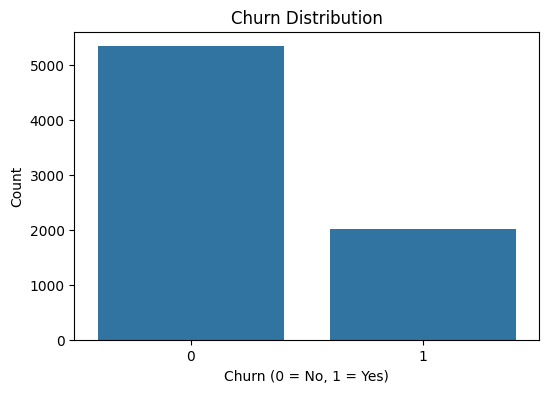

In [52]:
# churn distribution

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=churn_pred_copy)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [53]:
print(churn_pred_copy.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
Churn                 int64
dtype: object


In [54]:
# # # create a copy of cleaned data in a new folder 'processed'

# creating directory if it doesn't exist
if not os.path.exists('DATA/processed'):
    os.makedirs('DATA/processed')

# save full clean dataset 
churn_pred_copy.to_csv('DATA/processed/clean_data.csv', index=False)
